In [1]:
import polars as pl

pl.Config.set_tbl_rows(50)
pl.Config.set_tbl_cols(-1)

polars.config.Config

In [2]:
tracking_df = pl.read_parquet("../data/split_prepped_data/*_features.parquet")
play_df = pl.read_csv("../data/bdb_2024/plays.csv", null_values=["", "NA", "na", "nan", "NaN", "NAN"]).with_columns(
    distanceToGoal=(
        pl.when(pl.col("possessionTeam") == pl.col("yardlineSide"))
        .then(100 - pl.col("yardlineNumber"))
        .otherwise(pl.col("yardlineNumber"))
    )
)

play_df.sample(3)

gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,distanceToGoal
i64,i64,i64,str,str,i64,i64,i64,str,str,str,i64,str,i64,i64,str,i64,i64,i64,i64,str,i64,str,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64
2022092503,1358,42718,"""Raheem Mostert""","""(8:53) (Shotgun) R.Mostert up …",2,2,4,"""MIA""","""BUF""","""BUF""",32,"""8:53""",7,14,null,null,null,9,9,"""N""",78,"""SHOTGUN""",6,0.475998,0.316408,0.683592,0.023656,-0.023656,3.844154,0.589226,null,null,null,null,32
2022091802,2656,41349,"""Logan Thomas""","""(3:04) (Shotgun) C.Wentz pass …",3,2,9,"""WAS""","""DET""","""DET""",20,"""3:04""",22,7,"""C""",19,null,20,20,"""N""",30,"""SHOTGUN""",5,0.769132,0.846794,0.153206,-0.021943,0.021943,4.393594,2.606406,null,null,null,null,20
2022091109,2824,38696,"""Marvin Jones""","""(4:48) (Shotgun) T.Lawrence pa…",3,3,9,"""JAX""","""WAS""","""JAX""",33,"""4:48""",14,9,"""C""",10,null,10,10,"""N""",77,"""SHOTGUN""",6,0.986672,0.722356,0.277644,-0.060638,0.0606381,0.3476,2.132306,null,null,null,null,67


In [3]:
results_df = pl.concat(
    [
        pl.read_parquet("../models/best_models/zoo/best_model_results.parquet"),
        pl.read_parquet("../models/best_models/transformer/best_model_results.parquet"),
    ],
    how="diagonal",
).join(
    tracking_df.filter(pl.col("is_ball_carrier") == 1)
    .select(["x", "y", "gameId", "playId", "frameId", "mirrored", "event"])
    .rename({"x": "ball_carrier_x", "y": "ball_carrier_y"}),
    on=["gameId", "playId", "frameId", "mirrored"],
    how="inner",
)
print(len(results_df))
results_df.sample(10)

2118428


gameId,playId,mirrored,frameId,ballCarrierNflId,ballCarrierName,tackle_frameId,tackle_event,tackle_x,tackle_y,playResult,anchor_x,anchor_y,tackle_x_rel,tackle_y_rel,dataset_split,tackle_x_rel_pred,tackle_y_rel_pred,tackle_x_pred,tackle_y_pred,params,model_dim,num_layers,model_type,batch_size,dropout,learning_rate,num_heads,dim_feedforward,ball_carrier_x,ball_carrier_y,event
i64,i64,bool,i64,i64,str,i64,str,f64,f64,i64,f64,f64,f64,f64,str,f32,f32,f64,f64,i32,i32,i32,str,i32,f64,f64,i32,i32,f64,f64,str
2022091806,3588,true,1,53549,"""Rhamondre Stevenson""",60,"""tackle""",59.62,18.91,6,46.92,25.87,12.7,-6.96,"""test""",9.23,-6.81,56.15,19.06,72502,128,2,"""zoo""",256,0.3,0.0001,null,null,46.92,25.87,null
2022101602,56,false,61,52470,"""A.J. Dillon""",65,"""tackle""",34.25,20.0,1,29.56,26.51,4.69,-6.51,"""test""",3.66,-3.18,33.22,23.33,72502,128,2,"""zoo""",256,0.3,0.0001,null,null,34.84,19.82,null
2022092509,1687,true,7,52733,"""James Robinson""",28,"""out_of_bounds""",95.74,0.13,7,83.69,13.13,12.05,-13.0,"""train""",8.05,-8.41,91.74,4.72,72502,128,2,"""zoo""",256,0.3,0.0001,null,null,84.66,10.2,null
2022102700,2377,true,43,46437,"""Gus Edwards""",45,"""tackle""",78.28,38.43,1,70.1,29.57,8.18,8.86,"""train""",8.11,9.54,78.21,39.11,815022,128,4,"""transformer""",256,0.3,0.0001,4,512,78.17,37.9,null
2022101607,1368,true,17,53453,"""Najee Harris""",43,"""tackle""",63.24,11.78,1,57.3,12.52,5.94,-0.74,"""train""",4.99,-0.61,62.29,11.91,72502,128,2,"""zoo""",256,0.3,0.0001,null,null,62.96,12.26,null
2022100906,870,false,35,37101,"""Mark Ingram""",41,"""tackle""",44.84,36.62,4,33.4,29.55,11.44,7.07,"""train""",11.33,5.71,44.73,35.26,72502,128,2,"""zoo""",256,0.3,0.0001,null,null,43.05,35.65,null
2022091100,3757,false,18,39975,"""Cordarrelle Patterson""",42,"""tackle""",49.27,26.7,8,34.16,29.64,15.11,-2.94,"""train""",12.07,0.71,46.23,30.35,815022,128,4,"""transformer""",256,0.3,0.0001,4,512,36.84,30.16,null
2022100209,2631,true,34,47836,"""Miles Sanders""",54,"""tackle""",25.2,22.28,3,16.32,31.72,8.88,-9.44,"""test""",8.22,-9.22,24.54,22.5,815022,128,4,"""transformer""",256,0.3,0.0001,4,512,20.81,25.01,null
2022091106,2429,true,23,46203,"""Chase Edmonds""",42,"""tackle""",77.21,27.64,4,68.13,27.32,9.08,0.32,"""train""",9.21,1.83,77.34,29.15,72502,128,2,"""zoo""",256,0.3,0.0001,null,null,71.57,30.36,null


In [4]:
# from sklearn.metrics import mean_squared_error
# from torch.nn.functional import mse_loss
# from torch import tensor
import numpy as np

# def calculate_mse(x: pl.Series, y: pl.Series, xhat: pl.Series, yhat: pl.Series):
#     """
#     Calculate the mean squared error between the predicted and true values of x and y.
#     """
#     x, y, xhat, yhat = x.to_numpy(), y.to_numpy(), xhat.to_numpy(), yhat.to_numpy()
#     return np.mean((np.array([xhat - x, yhat - y]) ** 2).mean(axis=0))


def calculate_mae(x: pl.Series, y: pl.Series, xhat: pl.Series, yhat: pl.Series):
    """
    Calculate the mean average error between the predicted and true values of x and y.
    """
    x, y, xhat, yhat = x.to_numpy(), y.to_numpy(), xhat.to_numpy(), yhat.to_numpy()
    return np.mean(np.abs(np.array([xhat - x, yhat - y])).mean(axis=0))


(
    results_df.group_by(["dataset_split", "model_type"], maintain_order=True)
    .agg(
        n_frames=pl.struct(["gameId", "playId", "frameId", "mirrored"]).n_unique(),
        n_plays=pl.struct(["gameId", "playId"]).n_unique(),
        score=pl.map_groups(
            exprs=["tackle_x", "tackle_y", "tackle_x_pred", "tackle_y_pred"],
            function=lambda list_of_series: calculate_mae(*list_of_series),
            returns_scalar=True,
        ).round(2),
    )
    .pivot(values="score", columns=["model_type"], index=["dataset_split", "n_plays", "n_frames"])
    .with_columns(perf_perc_diff=((pl.col("zoo") - pl.col("transformer")) * 100 / pl.col("zoo")).round(1))
)

/tmp/ipykernel_3314850/1056652358.py:33: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(values="score", columns=["model_type"], index=["dataset_split", "n_plays", "n_frames"])


dataset_split,n_plays,n_frames,zoo,transformer,perf_perc_diff
str,u32,u32,f64,f64,f64
"""train""",8735,740590,3.1,2.69,13.2
"""val""",1872,158500,3.68,2.97,19.3
"""test""",1871,160124,3.63,2.89,20.4


In [5]:
frame_diff_df = (
    results_df.with_columns(
        frame_difference_from_tackle=(pl.col("tackle_frameId") - pl.col("frameId")),
    )
    .with_columns(
        frame_difference_from_tackle_cat=(pl.col("frame_difference_from_tackle").cut(
            breaks=range(0, 31, 5),
            labels=["after tackle", "0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30+"],
            left_closed=True,
            )
        )
    )
    .filter(pl.col("dataset_split") == "test")
    .group_by(["model_type", "frame_difference_from_tackle_cat"])
    .agg(
        order=pl.col("frame_difference_from_tackle").mean()*-1,
        n_frames=pl.len(),
        n_plays=pl.struct(["gameId", "playId"]).n_unique(),
        score=pl.map_groups(
            exprs=["tackle_x", "tackle_y", "tackle_x_pred", "tackle_y_pred"],
            function=lambda list_of_series: calculate_mae(*list_of_series),
            returns_scalar=True,
        ).round(2),
    )
    .sort("frame_difference_from_tackle_cat")
    # .pivot(values="score", on=["model_type"], index=["frame_difference_from_tackle_cat", "n_frames"])
    # .with_columns(perf_perc_diff=((pl.col("zoo") - pl.col("transformer")) * 100 / pl.col("zoo")).round(1))
)
frame_diff_df

model_type,frame_difference_from_tackle_cat,order,n_frames,n_plays,score
str,cat,f64,u32,u32,f64
"""transformer""","""after tackle""",2.499599,14960,1871,0.87
"""zoo""","""after tackle""",2.499599,14960,1871,2.82
"""transformer""","""0-5""",-2.0,18710,1871,0.86
"""zoo""","""0-5""",-2.0,18710,1871,2.59
"""transformer""","""5-10""",-6.98378,18496,1870,0.99
"""zoo""","""5-10""",-6.98378,18496,1870,2.38
"""zoo""","""10-15""",-11.969812,17358,1787,2.3
"""transformer""","""10-15""",-11.969812,17358,1787,1.38
"""transformer""","""15-20""",-16.963783,15904,1651,1.96


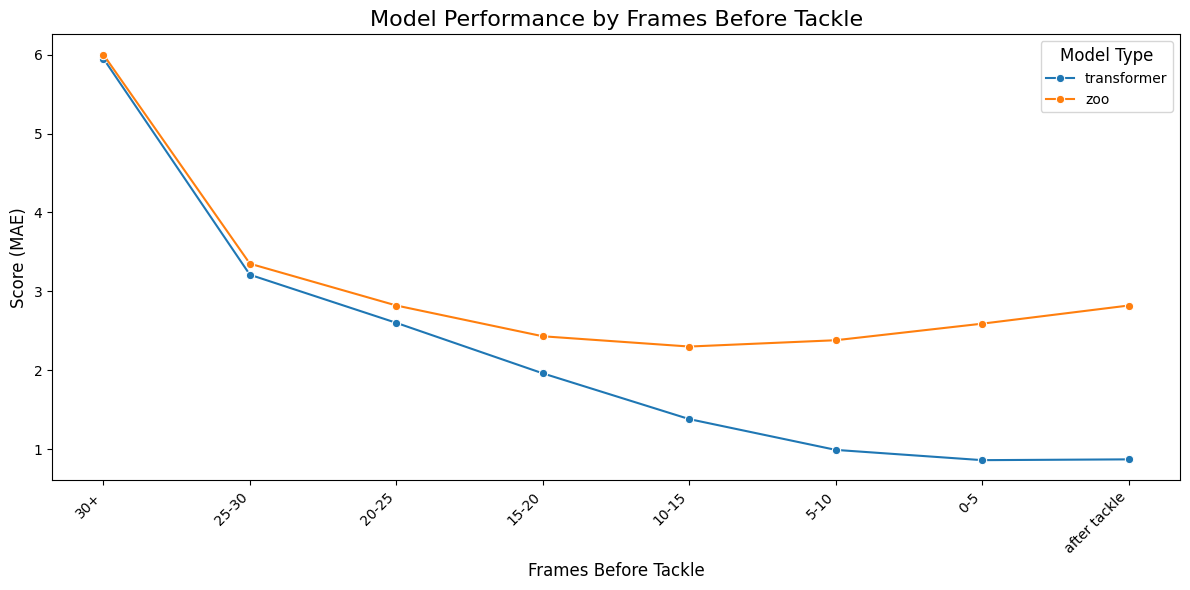

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Polars DataFrame to a Pandas DataFrame
frame_diff_df_pandas = frame_diff_df.to_pandas()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=frame_diff_df_pandas, x='frame_difference_from_tackle_cat', y='score', hue='model_type', marker='o')
# Flip the x-axis
plt.gca().invert_xaxis()

# Adjust x-axis labels for better readability after flipping
plt.xticks(rotation=45, ha='right')

# Customize the plot
plt.title('Model Performance by Frames Before Tackle', fontsize=16)
plt.xlabel("Frames Before Tackle", fontsize=12)
plt.ylabel('Score (MAE)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Type', title_fontsize='12', fontsize='10')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [7]:
# split loss up by scramble, run, pass
(
    results_df.filter(pl.col("dataset_split").is_in(["test"]))
    .filter(pl.col("event").is_not_null())
    .group_by(["model_type", "event"])
    .agg(
        n_frames=pl.len(),
        n_plays=pl.struct(["gameId", "playId"]).n_unique(),
        avg_frameId=pl.col("frameId").mean().round(1),
        score=pl.map_groups(
            exprs=["tackle_x", "tackle_y", "tackle_x_pred", "tackle_y_pred"],
            function=lambda list_of_series: calculate_mae(*list_of_series),
            returns_scalar=True,
        ).round(2),
    )
    .sort(["event", "model_type"])
    .pivot(values="score", columns=["model_type"], index=["event", "n_plays", "n_frames", "avg_frameId"])
    .filter(pl.col("n_plays") > 100)
    .with_columns(perf_perc_diff=((pl.col("zoo") - pl.col("transformer")) * 100 / pl.col("zoo")).round(1))
    .sort("avg_frameId")
)

/tmp/ipykernel_3314850/1940622253.py:17: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(values="score", columns=["model_type"], index=["event", "n_plays", "n_frames", "avg_frameId"])


event,n_plays,n_frames,avg_frameId,transformer,zoo,perf_perc_diff
str,u32,u32,f64,f64,f64,f64
"""pass_arrived""",732,1466,3.0,2.96,3.24,8.6
"""ball_snap""",958,1916,6.0,5.45,5.4,-0.9
"""pass_outcome_caught""",842,1684,6.0,2.63,2.94,10.5
"""run""",142,284,13.4,4.3,4.93,12.8
"""handoff""",887,1776,18.8,4.19,4.2,0.2
"""first_contact""",1578,3156,27.2,1.83,2.54,28.0
"""out_of_bounds""",272,544,33.2,1.18,3.35,64.8
"""tackle""",1497,2994,40.1,0.72,2.51,71.3


In [8]:
# split loss up by scramble, run, pass
(
    results_df.filter(pl.col("dataset_split").is_in(["test", "val"]))
    .group_by(["model_type", "tackle_event"])
    .agg(
        n_frames=pl.len(),
        n_plays=pl.struct(["gameId", "playId"]).n_unique(),
        score=pl.map_groups(
            exprs=["tackle_x", "tackle_y", "tackle_x_pred", "tackle_y_pred"],
            function=lambda list_of_series: calculate_mae(*list_of_series),
            returns_scalar=True,
        ).round(2),
    )
    .sort(["tackle_event", "model_type"])
    .pivot(values="score", columns=["model_type"], index=["tackle_event", "n_plays", "n_frames"])
    .with_columns(perf_perc_diff=((pl.col("zoo") - pl.col("transformer")) * 100 / pl.col("zoo")).round(1))
)

/tmp/ipykernel_3314850/111673235.py:15: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  .pivot(values="score", columns=["model_type"], index=["tackle_event", "n_plays", "n_frames"])


tackle_event,n_plays,n_frames,transformer,zoo,perf_perc_diff
str,u32,u32,f64,f64,f64
"""fumble""",27,1886,3.57,4.24,15.8
"""out_of_bounds""",548,40944,4.33,5.3,18.3
"""qb_slide""",37,2790,3.52,4.32,18.5
"""tackle""",3015,262708,2.59,3.27,20.8
"""touchdown""",116,10296,5.78,6.55,11.8


In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


def animate_play(
    tracking_df: pl.DataFrame,
    play_df: pl.DataFrame,
    results_df: pl.DataFrame,
    gameId: int,
    playId: int,
    mirrored: bool = False,
):
    """
    Animate a play from the tracking data and the results of the models.
    """
    mvmt_df = (
        tracking_df.filter(
            (pl.col("gameId") == gameId) & (pl.col("playId") == playId) & (pl.col("mirrored") == mirrored)
        )
        .to_pandas()
        .round(2)
    )
    play_df = play_df.filter((pl.col("gameId") == gameId) & (pl.col("playId") == playId)).to_pandas()
    model_results_df = results_df.filter(
        (pl.col("gameId") == gameId) & (pl.col("playId") == playId) & (pl.col("mirrored") == mirrored)
    ).to_pandas()
    assert len(mvmt_df) > 0
    assert len(play_df) > 0
    assert len(model_results_df) > 0

    mvmt_df["side"] = mvmt_df["side"].replace({1: "OFF", -1: "DEF"})
    # display(mvmt_df.sample(3), play_df, model_results_df)

    # get some info
    distToGoal = play_df["distanceToGoal"].values[0]
    down = play_df["down"].values[0]
    yards_to_go = play_df["yardsToGo"].values[0]
    play_description = play_df["playDescription"].values[0]
    ballCarrierName = model_results_df["ballCarrierName"].values[0]
    off_club = mvmt_df.loc[mvmt_df["side"] == "OFF", "club"].values[0]
    def_club = mvmt_df.loc[mvmt_df["side"] == "DEF", "club"].values[0]
    dataset_split = model_results_df["dataset_split"].values[0]

    mvmt_y_min = mvmt_df["x"].min()
    mvmt_y_max = mvmt_df["x"].max()

    tkl_x, tkl_y = model_results_df[["tackle_x", "tackle_y"]].values[0]
    # Get prediction data for animation
    tkl_mvmt_df = model_results_df.sort_values("frameId")[["model_type", "frameId", "tackle_x_pred", "tackle_y_pred"]]
    tkl_mvmt_df = tkl_mvmt_df.rename(columns={"tackle_x_pred": "x", "tackle_y_pred": "y"})
    tkl_mvmt_df["displayName"] = tkl_mvmt_df["model_type"]
    tkl_mvmt_df["nflId"] = tkl_mvmt_df["model_type"].map({"zoo": -10, "transformer": -20})
    tkl_mvmt_df["club"] = tkl_mvmt_df["model_type"]
    tkl_mvmt_df["side"] = tkl_mvmt_df["model_type"]
    tkl_mvmt_df["symbol"] = tkl_mvmt_df["model_type"]
    tkl_mvmt_df["size"] = 1
    tkl_mvmt_df["jerseyNumber"] = ""
    tkl_mvmt_df["is_ball_carrier"] = -1

    # set some things
    # colors_df = pl.read_csv("../data/team_colors.csv")
    # club_color_map = dict(colors_df.select(["club", "secondaryCol"]).rows())
    mvmt_df["size"] = 2
    mvmt_df["text_color"] = "black"

    # Different symbols for different positions
    mvmt_df["symbol"] = "player"
    mvmt_df.loc[mvmt_df["is_ball_carrier"] == 1, "symbol"] = "ball_carrier"
    mvmt_df.loc[mvmt_df["is_ball_carrier"] == 1, "size"] = 3
    # mvnt.loc[mvnt["side"] == "BALL", "symbol"] = "diamond_0"
    symbol_map = {"player": "circle", "ball_carrier": "hexagon", "zoo": "x", "transformer": "x"}

    # operations to do on both tackle and mvmt data
    mvmt_df = pd.concat([mvmt_df, tkl_mvmt_df]).sort_values(["frameId", "nflId"])
    mvmt_df["frameId_grp"] = mvmt_df["frameId"]
    mvmt_df = mvmt_df.groupby("frameId_grp").bfill()

    # display(mvmt_df.head(5))
    mvmt_df["frameId_event"] = mvmt_df["frameId"].astype(str) + mvmt_df["event"].fillna("").astype(str).apply(
        lambda x: f"_{x}" if len(x) > 0 else x
    )

    # Data to display on hover
    hover_data = {
        "displayName": True,
        "club": False,
        "side": False,
        "jerseyNumber": False,
        "is_ball_carrier": True,
        "symbol": False,
        "frameId": False,
        "x": True,
        "y": True,
        "vx": True,
        "vy": True,
        "size": False,
    }

    X_LEFT = 0
    X_MIDDLE = 160 / 6.0
    X_RIGHT = 160 / 3.0
    Y_MIN = 0
    Y_MAX = 120
    Y_MIDDLE = 60
    fig = px.scatter(
        data_frame=mvmt_df,
        x="y",
        y="x",
        animation_frame="frameId_event",
        animation_group="nflId",
        hover_name="displayName",
        hover_data=hover_data,
        text="jerseyNumber",
        width=1000,
        height=900,
        # range_x=[-160 / 6.0, 160 / 6.0],
        range_x=[X_LEFT - 2, X_RIGHT + 2],
        size="size",
        size_max=15,
        color="side",
        color_discrete_map={"OFF": "#39FF14", "DEF": "#FF69B4", "zoo": "blue", "transformer": "gold"},
        opacity=0.9,
        symbol="symbol",
        symbol_map=symbol_map,
    )

    # Add marker for tackle location
    fig.add_trace(
        go.Scatter(
            x=[tkl_y],
            y=[tkl_x],
            mode="markers",
            marker=dict(color="green", size=15, symbol="x"),
            hoverinfo="none",
            showlegend=False,
            opacity=0.8,
        )
    )

    # Add line of scrimmage
    los = Y_MAX - 10 - distToGoal
    fig.add_shape(
        type="line",
        x0=X_LEFT,
        y0=los,
        x1=X_RIGHT,
        y1=los,
        line=dict(color="rgba(137, 207, 240, 0.2)", width=3, dash="dash"),
    )
    # Add yards to go line
    fig.add_shape(
        type="line",
        x0=X_LEFT,
        y0=los + yards_to_go,
        x1=X_RIGHT,
        y1=los + yards_to_go,
        line=dict(color="rgba(255, 255, 0, 0.2)", width=3, dash="dash"),
    )
    # Add border to the field
    fig.add_shape(
        type="rect", x0=X_LEFT, y0=Y_MIN, x1=X_RIGHT, y1=Y_MAX, line=dict(color="rgba(255, 255, 255, 0.5)", width=10)
    )
    # endzone
    fig.add_shape(
        type="rect",
        x0=X_LEFT,
        y0=Y_MAX - 10,
        x1=X_RIGHT,
        y1=Y_MAX,
        line=dict(color="#39FF14", width=6),
        opacity=0.4,
    )
    # Add the path traces to the figure first to place them in the background
    # for trace in path_traces:
    #     fig.add_trace(trace)

    # set play speed
    frame_duration = 100
    for button in fig.layout.updatemenus[0].buttons:
        button["args"][1]["frame"]["duration"] = frame_duration
    # set aspect ratio
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    # background color
    fig.update_layout(paper_bgcolor="#333333", plot_bgcolor="#363636", font_color="white", font_size=14)
    # turn off axis
    fig.update_xaxes(showgrid=False, zeroline=False, showticklabels=False)
    # grid line thickness
    fig.update_yaxes(
        showgrid=True,
        gridwidth=3,
        gridcolor="rgba(237, 234, 222, 0.1)",
        linewidth=0,
        linecolor="rgba(0, 0, 0, 0.01)",
        mirror=True,
        showticklabels=False,
    )
    # set y axis range
    fig.update_yaxes(range=[mvmt_y_min, mvmt_y_max])
    # set yaxes ticks to 10 yards
    # fig.update_yaxes(tick0=0, dtick=10)
    # text size
    fig.update_layout(uniformtext_minsize=2, uniformtext_mode="hide")
    # hide legend
    fig.update_layout(showlegend=False)
    # text color of jersey numbers
    fig.update_traces(textfont=dict(family="Tahoma", size=12, color=mvmt_df["text_color"]))
    fig.update_traces(marker_line_width=0)

    # hide x and y labels
    fig.update_xaxes(title_text="")
    fig.update_yaxes(title_text="")

    # add hash marks, yard markers, etc
    for y_loc in range(Y_MIN + 10, Y_MAX - 10 + 1, 1):
        if y_loc % 10 == 0:
            ydln = y_loc - 10 if y_loc <= 60 else 110 - y_loc
            ydln_txt = str(ydln) if ydln != 0 else "E Z"
            fig.add_shape(
                type="line", x0=X_LEFT, y0=y_loc, x1=X_RIGHT, y1=y_loc, line=dict(color="white", width=2), opacity=0.05
            )
            fig.add_annotation(
                x=X_LEFT + 4,
                y=y_loc,
                text=ydln_txt,
                showarrow=False,
                font=dict(color="white", size=60),
                textangle=90,
                opacity=0.05,
            )
            fig.add_annotation(
                x=X_RIGHT - 4,
                y=y_loc,
                text=ydln_txt,
                showarrow=False,
                font=dict(color="white", size=60),
                textangle=270,
                opacity=0.05,
            )
        elif y_loc % 5 == 0:
            fig.add_shape(
                type="line", x0=X_LEFT, y0=y_loc, x1=X_RIGHT, y1=y_loc, line=dict(color="white", width=1), opacity=0.05
            )
        else:
            fig.add_shape(
                type="rect",
                x0=X_MIDDLE - 9.5,
                y0=y_loc,
                x1=X_MIDDLE - 8.5,
                y1=y_loc,
                line=dict(color="white", width=3),
                opacity=0.05,
            )
            fig.add_shape(
                type="rect",
                x0=X_MIDDLE + 9.5,
                y0=y_loc,
                x1=X_MIDDLE + 8.5,
                y1=y_loc,
                line=dict(color="white", width=3),
                opacity=0.05,
            )

    fig.add_annotation(
        x=X_MIDDLE, y=Y_MAX - 5, text=off_club, showarrow=False, font=dict(color="white", size=90), opacity=0.2
    )
    fig.add_annotation(
        x=X_MIDDLE, y=Y_MIDDLE + 2, text="SŪMER", showarrow=False, font=dict(color="white", size=50), opacity=0.05
    )
    fig.add_annotation(
        x=X_MIDDLE, y=Y_MIDDLE - 2, text="SPORTS", showarrow=False, font=dict(color="white", size=50), opacity=0.05
    )

    # Add play description
    if play_description is not None:
        # make list of 100 character slices
        play_desc_list = [play_description[i : i + 100] for i in range(0, len(play_description), 100)]
        for i, play_desc_txt in enumerate(play_desc_list):
            text_y_loc = mvmt_y_min - 5 - 1 * i
            fig.add_annotation(
                x=X_MIDDLE,
                y=text_y_loc,
                text=play_desc_txt,
                showarrow=False,
                font=dict(color="white", size=14),
                opacity=0.8,
            )

    # set title
    # offense = play_info["offense"].values[0].upper()
    # defense = play_info["defense"].values[0].upper()
    # down = int(play_info["down"].values[0])
    # yards_to_go = int(play_info["yards_to_go"].values[0])
    # quarter = int(play_info["quarter"].values[0])
    # game_clock = play_info["game_clock"].values[0]
    fig.update_layout(
        title=f"{dataset_split} | {ballCarrierName} | {gameId} {playId} | {off_club} vs {def_club} | Down: {down} | YTG: {yards_to_go} | DTG: {distToGoal}",
        font_size=12,
        title_x=0.5,
        title_y=0.98,
    )

    return fig

In [ ]:
gid, pid = (
    results_df.filter(pl.col("dataset_split").is_in(["test"])).select(["gameId", "playId"]).sample(1).to_numpy()[0]
)

# gid, pid = 2022100206, 988 # austin ekeler reverse TD
# gid, pid = 2022092505, 2441 # lamar scramble with a broken tackle # zoo model goes crazy near the end
# gid, pid = 2022102305, 380 # blocker causes prediction to jump
# gid, pid = 2022092501, 2398 # huge hole opens up and prediction jumps # this one is good frames 50-60. Zoo doesnt seem to generalize well in open field situations, even transformer struggles much later
# gid, pid = 2022100909, 1582 # derrik henry dead run -> huge run
# gid, pid = 2022103004, 2631 # Dameon Pierce weaving run
# gid, pid = 2022103002, 3044 # Jet Sweep shows poor generalization from Zoo model
# gid, pid = 2022102307, 641 # Breece Hall huge TD with Transformer model picking up the hole opening (frames 35-40) much more than Zoo model
# gid, pid = 2022091109, 187 # James Rob. big run to left. Sumer model picks up earlier it is going to be a big run
gid, pid = 2022091805, 3127  # long CMC run, frames 40-47 huge difference in prediction


#### OOB Test Set ####
# gid, pid = 2022092200, 1477
# gid, pid = 2022100203, 3117
# gid, pid = 2022100212, 3385
# gid, pid = 2022102307, 1976

print(f"gid, pid = {gid}, {pid}")
animate_play(tracking_df, play_df, results_df, gid, pid)